In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import Data

# Importing and Cleaning Data

In [ ]:
df = Data.DF.copy()
df.dropna(subset=['job_no_degree_mention'], inplace=True)

In [7]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df = df[df['job_title_short'].isin(job_titles)]

df_pivot = df.pivot_table(
    index='job_title_short',
    columns='job_no_degree_mention',
    aggfunc='size',
    fill_value=0
).reset_index()

# Visualizations

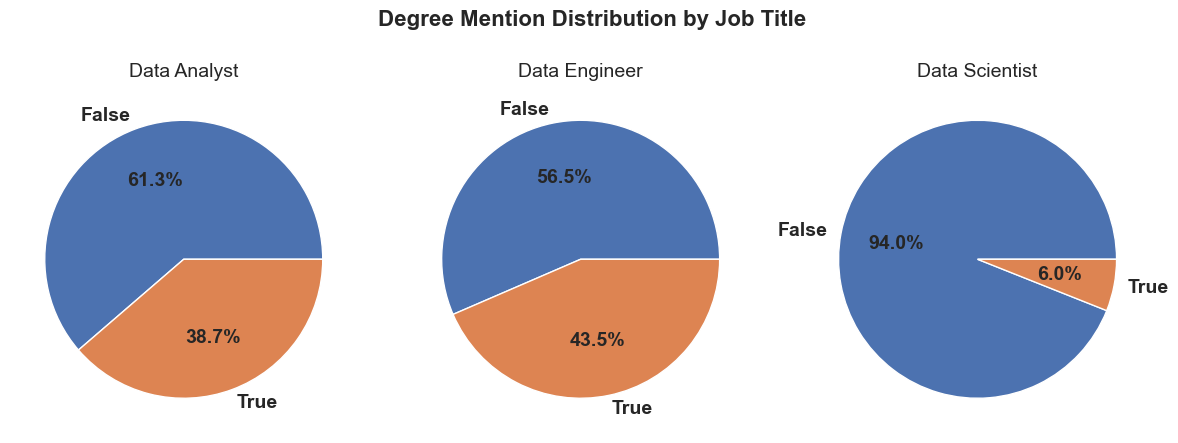

In [ ]:
sns.set_theme()
fig, axes = plt.subplots(1, 3, figsize=(10*1.2, 4*1.2))

for ax, job in zip(axes, job_titles):
    row = df_pivot[df_pivot['job_title_short'] == job].set_index('job_title_short')
    row.T.plot(
        kind='pie',
        y=job,
        autopct='%1.1f%%',
        legend=False,
        ax=ax,
        textprops={'fontsize': 14, 'fontweight':'bold'}
    )
    ax.set_title(f"{job}", fontsize=14)
    ax.set_ylabel("")

plt.suptitle("Degree Mention Distribution by Job Title", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()